In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
y_train = []
image_size = 150

In [ ]:
train_path = '/content/drive/MyDrive/classification1/Training'
labels = os.listdir(train_path)
print(labels)

['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']


In [ ]:
for i in labels:
    folder_path = os.path.join(train_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [ ]:


test_path = '/content/drive/MyDrive/classification1/Testing'



In [ ]:
for i in labels:
    folder_path = os.path.join(test_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [ ]:


X_train[1]



array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
y_train[1]

'meningioma_tumor'

In [ ]:
# X_train.shape, y_train.shape
len(X_train), len(y_train)

(150, 150)

In [ ]:


X_train = np.array(X_train)
y_train = np.array(y_train)



In [ ]:


X_train.shape, y_train.shape



((150, 150, 150, 3), (150,))

In [ ]:


X_train[1]



array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:


y_train[1]



'meningioma_tumor'

In [ ]:


X_train, y_train = shuffle(X_train, y_train, random_state = 99)
X_train.shape, y_train.shape



((150, 150, 150, 3), (150,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 100)

In [ ]:
y_train[:5]

array(['glioma_tumor', 'glioma_tumor', 'glioma_tumor', 'meningioma_tumor',
       'pituitary_tumor'], dtype='<U16')

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train_new[:5]

[2, 2, 2, 0, 1]

In [ ]:
y_train_new = tf.keras.utils.to_categorical(y_train_new)
y_train_new

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [ ]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))

y_test_new = tf.keras.utils.to_categorical(y_test_new)
y_test_new

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (image_size, image_size, 3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
hist = model.fit(X_train, y_train_new, epochs = 20, validation_split = 0.1)

Epoch 1/20
4/4 [==============================] - 27s 6s/step - loss: 8.9872 - accuracy: 0.2810 - val_loss: 1.4067 - val_accuracy: 0.2857
Epoch 2/20
4/4 [==============================] - 25s 6s/step - loss: 1.4214 - accuracy: 0.2727 - val_loss: 1.3809 - val_accuracy: 0.2857
Epoch 3/20
4/4 [==============================] - 23s 6s/step - loss: 1.3823 - accuracy: 0.2645 - val_loss: 1.3792 - val_accuracy: 0.3571
Epoch 4/20
4/4 [==============================] - 23s 6s/step - loss: 1.3819 - accuracy: 0.2645 - val_loss: 1.3767 - val_accuracy: 0.3571
Epoch 5/20
4/4 [==============================] - 23s 6s/step - loss: 1.3798 - accuracy: 0.2727 - val_loss: 1.3729 - val_accuracy: 0.3571
Epoch 6/20
4/4 [==============================] - 24s 6s/step - loss: 1.3787 - accuracy: 0.3058 - val_loss: 1.3666 - val_accuracy: 0.3571
Epoch 7/20
4/4 [==============================] - 28s 6s/step - loss: 1.3834 - accuracy: 0.2562 - val_loss: 1.3683 - val_accuracy: 0.4286
Epoch 8/20
4/4 [==================

In [ ]:
model.save("Brain_Tumor_Image_Classification_Model.h5")

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy'] 

In [ ]:
# acc, val_acc

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

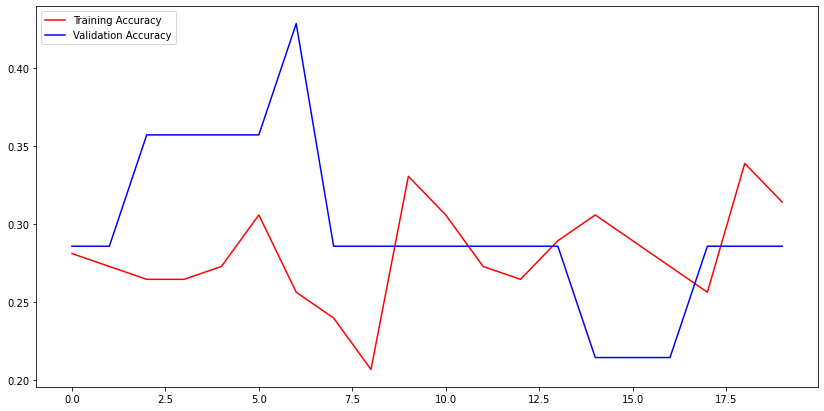

In [ ]:
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.show()

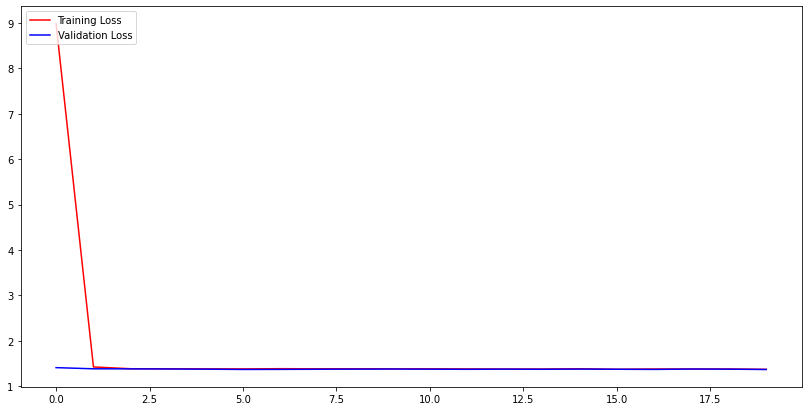

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss'] 

epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
img_path = '/content/drive/MyDrive/classification1/Testing/glioma_tumor/image(1).jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))
img_array = np.array(img)

img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [ ]:
from tensorflow.keras.preprocessing import image

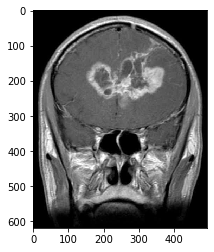

In [ ]:
img = image.load_img(img_path)
plt.imshow(img, interpolation = 'nearest')
plt.show()

In [ ]:
a = model.predict(img_array)
print(a)

1/1 [==============================] - 0s 236ms/step
[[0.22807753 0.2595773  0.26425466 0.24809049]]


In [ ]:
indices = a.argmax()
indices

2

In [ ]:
labels[indices]

'glioma_tumor'